In [1]:
from experiment import Experiment
%matplotlib inline

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
var_dict = dict(
    numerical_vars = ['age', 'fnlwgt', 'education-num', 'hours-per-week',
                      'capital-gain' ,'capital-loss'],
    categorical_vars = ['workclass', 'education', 'marital-status', 'occupation', 
                        'relationship', 'race', 'sex', 'native-country'],
    class_var = 'class'
)

In [3]:
exp = Experiment('data/adult.csv', 
                 var_dict,
                 embedding_dim=8,
                 lr=0.001,
                 batch_size=1024,
                 n_epoch=30,
                 verbose=True,
                 n_bins_range=range(2, 3),
                 n_init_bins_list=[10])

In [4]:
list_of_scores = exp.perform_exp()

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:838: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:838: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:838: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:838: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:838: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:

KeyboardInterrupt: 

In [ ]:
exp.print_scores(list_of_scores)

In [4]:
from data_handler import DataHandler
handler = DataHandler(exp.data, exp.var_dict)
from semantic_binning import SemanticBinning
sb = SemanticBinning(handler.var_dict, embedding_dim=8, batch_size=1024, 
                     n_epoch=300, lr=1e-2, weight_decay=0.0, verbose=True)
sb.fit(exp.data, n_init_bins=15)

ValueError: attempt to get argmax of an empty sequence

In [7]:
exp.data['capital-loss'].describe()

count    48842.000000
mean        87.502314
std        403.004552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

In [8]:
import pandas as pd

In [10]:
pd.qcut(exp.data['capital-loss'], q=10, duplicates='drop')

0        (-0.001, 4356.0]
1        (-0.001, 4356.0]
2        (-0.001, 4356.0]
3        (-0.001, 4356.0]
4        (-0.001, 4356.0]
5        (-0.001, 4356.0]
6        (-0.001, 4356.0]
7        (-0.001, 4356.0]
8        (-0.001, 4356.0]
9        (-0.001, 4356.0]
10       (-0.001, 4356.0]
11       (-0.001, 4356.0]
12       (-0.001, 4356.0]
13       (-0.001, 4356.0]
14       (-0.001, 4356.0]
15       (-0.001, 4356.0]
16       (-0.001, 4356.0]
17       (-0.001, 4356.0]
18       (-0.001, 4356.0]
19       (-0.001, 4356.0]
20       (-0.001, 4356.0]
21       (-0.001, 4356.0]
22       (-0.001, 4356.0]
23       (-0.001, 4356.0]
24       (-0.001, 4356.0]
25       (-0.001, 4356.0]
26       (-0.001, 4356.0]
27       (-0.001, 4356.0]
28       (-0.001, 4356.0]
29       (-0.001, 4356.0]
               ...       
48812    (-0.001, 4356.0]
48813    (-0.001, 4356.0]
48814    (-0.001, 4356.0]
48815    (-0.001, 4356.0]
48816    (-0.001, 4356.0]
48817    (-0.001, 4356.0]
48818    (-0.001, 4356.0]
48819    (-0

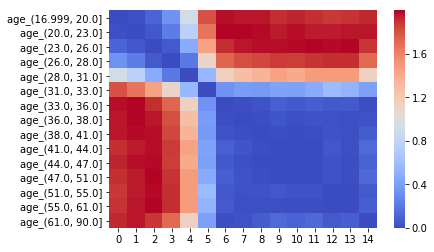

In [9]:
sb.plot_pairwise_distance_between_bins('age')

In [10]:
sb.bins_by_var['age']['bins']

['(16.999, 31.0]', '(31.0, 90.0]']

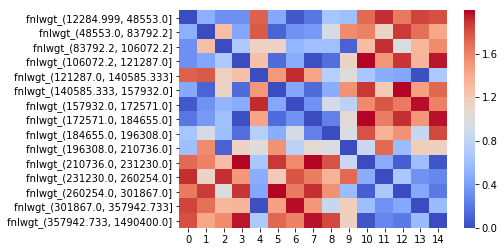

In [11]:
sb.plot_pairwise_distance_between_bins('fnlwgt')

In [12]:
sb.bins_by_var['fnlwgt']['bins']

['(12284.999, 140585.333]', '(140585.333, 1490400.0]']

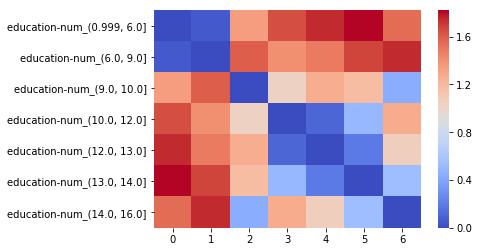

In [13]:
sb.plot_pairwise_distance_between_bins('education-num')

In [14]:
sb.bins_by_var['education-num']['bins']

['(0.999, 9.0]', '(9.0, 16.0]']

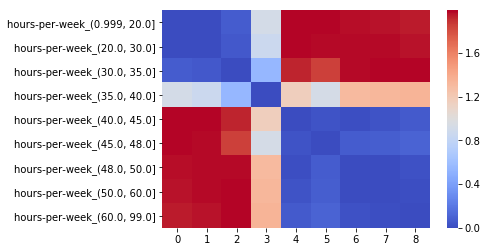

In [15]:
sb.plot_pairwise_distance_between_bins('hours-per-week')

In [16]:
sb.bins_by_var['hours-per-week']['bins']

['(0.999, 40.0]', '(40.0, 99.0]']

In [306]:
def _generate_instances(dummy_coded_data, n_variables):

    def make_target_vector(input_idx, non_zero_idxs, n_dummy_cols):
        target_vector = []
        for idx in range(n_dummy_cols):
            if (idx != input_idx and idx in non_zero_idxs):
                target_vector.append(1.0)
            else:
                target_vector.append(0.0)
        return target_vector

    inputs, targets = list(), list()
    n_dummy_cols = dummy_coded_data.shape[1]

    for _, row in dummy_coded_data.iterrows():
        non_zero_idxs = [idx for idx, (_, value) in enumerate(row.items()) if value == 1]
        for input_idx in non_zero_idxs:
            inputs.append(input_idx)
            targets.append(make_target_vector(input_idx, non_zero_idxs, n_dummy_cols))

    return inputs, targets

In [383]:
temp_dummy.columns

Index(['workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       ...
       'hours-per-week_(35.0, 40.0]', 'hours-per-week_(40.0, 45.0]',
       'hours-per-week_(45.0, 48.0]', 'hours-per-week_(48.0, 50.0]',
       'hours-per-week_(50.0, 55.0]', 'hours-per-week_(55.0, 60.0]',
       'hours-per-week_(60.0, 99.0]', 'capital-gain_(-0.001, 5013.0]',
       'capital-gain_(5013.0, 99999.0]', 'capital-loss_(-0.001, 4356.0]'],
      dtype='object', length=165)

In [395]:
from data_handler import DataHandler
handler = DataHandler(exp.data, exp.var_dict)
input_vars = exp.var_dict['numerical_vars'] + exp.var_dict['categorical_vars']
dummy_coded_data = handler.get_dummy_coded_data()

col_idxs_by_var = dict()
for var in input_vars:
    idxs = [idx for idx, col in enumerate(dummy_coded_data.columns) if col.split('_')[0] == var]
    col_idxs_by_var[var] = idxs

In [397]:
inputs, targets = _generate_instances(dummy_coded_data, len(input_vars))

In [398]:
from batch_generator import BatchGenerator

In [399]:
batch_gen = BatchGenerator(inputs, targets, 8)

In [400]:
input_batch, target_batch = batch_gen.next_batch()

In [433]:
class myLoss(nn.Module):
    def __init__(self, col_idxs_by_var):
        super(myLoss, self).__init__()
        self.col_idxs_by_var = col_idxs_by_var
        self.n_cols = sum([len(col_idxs) for col_idxs in col_idxs_by_var.values()])
        self.sigmoid = nn.Sigmoid()

    def forward(self, logits, target):
        y_hat = self.sigmoid(logits)
        loss = - (target * torch.log(y_hat) + (1 - target) * torch.log(1 - y_hat))
        for var, idxs in self.col_idxs_by_var.items():
            scaling_factor = [(1.0 / len(idxs)) if idx in idxs else 1.0 
                              for idx in range(self.n_cols)]
            scaling_factor = Variable(torch.FloatTensor(scaling_factor)).expand_as(loss)
            loss = torch.mul(loss, scaling_factor)
        loss = torch.mean(loss)
        return loss
mloss = myLoss(col_idxs_by_var)

In [434]:
l = mloss(be(Variable(torch.LongTensor(input_batch))), Variable(torch.FloatTensor(target_batch)))

False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [430]:
l

Variable containing:
1.00000e-02 *
  6.1498
[torch.FloatTensor of size 1]

In [432]:
l.requires_grad

True